In [ ]:
# https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/
# https://www.youtube.com/watch?v=feDJkDaNuOk

In [1]:
#installing all the necessary libraries
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install statsmodels


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# importing necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
# read the data using pandas
df= pd.read_csv("data_advertising/advertising.csv")

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


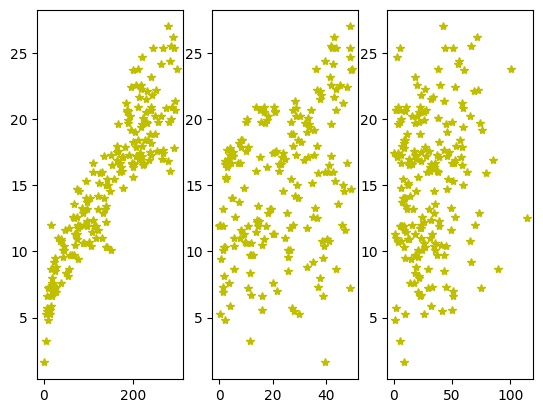

In [6]:
plt.subplot(1, 3,1)
plt.plot(df["TV"], df["Sales"], "*y")
plt.subplot(1, 3,2)
plt.plot(df["Radio"], df["Sales"], "*y")
plt.subplot(1, 3,3)
plt.plot(df["Newspaper"], df["Sales"], "*y")

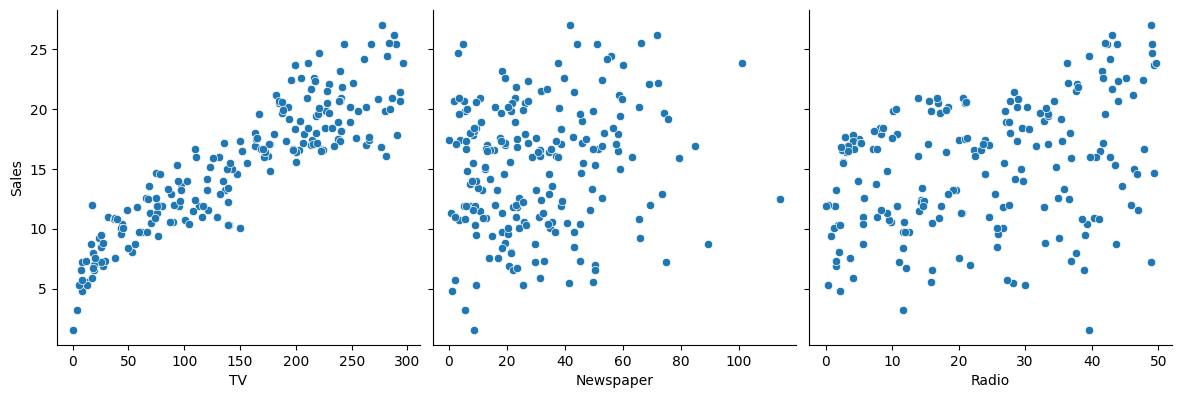

In [7]:
# plot the data 
sns.pairplot(df, x_vars=['TV', 'Newspaper','Radio'], y_vars = 'Sales', size = 4, kind = 'scatter')
plt.show()
# as can be seen, tv-sales plot has a more linear connection compare to orhers . 

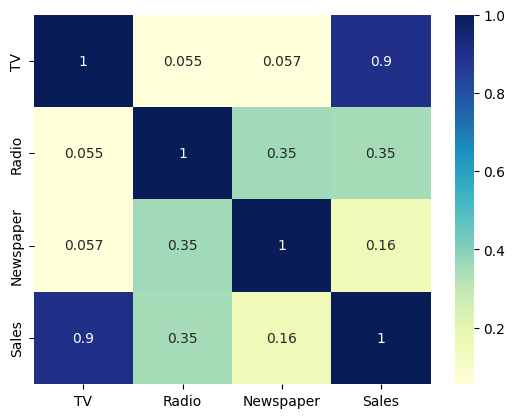

In [8]:
sns.heatmap(df.corr(), cmap ='YlGnBu', annot = True)
plt.show()
# annot=True: show the annotations around the figure.
# cmap: selects the color to be shown. 
# the corrolation between sales and tv is 0.9,so they are highly correlated. 

In [9]:
df.corr()
# It shows the corrolations between columns

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [10]:
df.size # 800 the total number of data 
df.shape # (200, 4) ==> 4 columns each 200 row ==800 

(200, 4)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
df.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
# Finding how many percent of the data is null: 
df.isnull().sum()*100/df.shape[0]


TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

In [14]:
# mean of TV column
m = df["TV"].sum()/len(df)
df["mse"]= df["TV"].apply(lambda x: (x-m)**2)

import numpy as np
import math
variance= df["mse"].sum()/(len(df))
std =math.sqrt((df["mse"].sum()/(len(df))))

df["outlier_TV"] = df["TV"].apply(lambda x: True if (x>(3*std + m)) or (x<(-3*std + m)) else False)
df["outlier_TV"].head()

0    False
1    False
2    False
3    False
4    False
Name: outlier_TV, dtype: bool

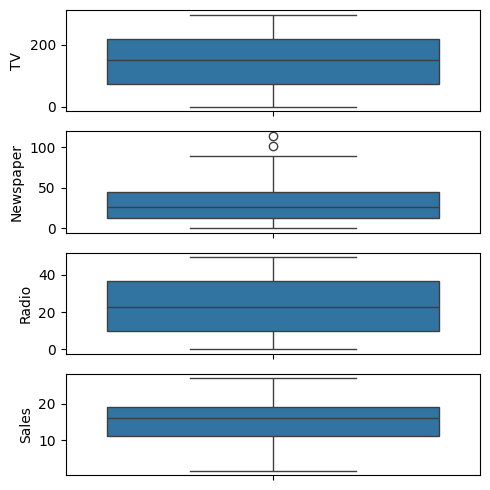

In [15]:
# Outlier Analysis
fig, axs = plt.subplots(4, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt4 = sns.boxplot(df['Sales'], ax = axs[3])
plt.tight_layout()

In [16]:
# we select only one variable which is more correlated to sales column as x and sales column as y. X= df["TV"]
X= df[["TV", "Radio", "Newspaper"]]
y= df["Sales"]

In [17]:
# we use sklearn to split the data into train and test 
# random_state means select the data randomly we don't want to for example select 70% form top of the dataset or bottom of  data. we want to have 140 data that has selected randomly form the data set.
#  It we change random_state and we run train_test_split, it will select another set of data randomly with another indexes.  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, test_size = 0.3, random_state = 100 )


In [18]:
# see the indexes has been selected randomly, 74, then 3, then 185 , ...
X_train

,TV,Radio,Newspaper
74,213.4,24.6,13.1
3,151.5,41.3,58.5
185,205.0,45.1,19.6
26,142.9,29.3,12.6
90,134.3,4.9,9.3
...,...,...,...
87,110.7,40.6,63.2
103,187.9,17.2,17.9
67,139.3,14.5,10.2
24,62.3,12.6,18.3


In [19]:
x = np.array(X_train).reshape(-1,3)

In [20]:
x.shape

(140, 3)

In [21]:
X_train.head()
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [22]:
# X_train and X_test, are one demonsion, in machin learning sklearn accepts 2 dimensionaml data. So we use NUmpy to reshape x train and test to 2 dimonsion:
# reshape(-1, 1) is instructing numpy to reshape the array into a two-dimensional array where the number of rows is determined 
# automatically based on the size of the original array, and there will be one column in the resulting array. This is often used 
# when you want to convert a 1D array into a 2D column vector.
###################
# So, .reshape(1, -1) is instructing numpy to reshape the array into a two-dimensional array where there is one row and the number of 
# columns is determined automatically based on the size of the original array. This is often used when you want to convert a 1D array 
#into a 2D row vector.


In [23]:
X_train= np.array(X_train).reshape(-1, 3)

In [24]:
X_test= np.array(X_test).reshape(-1, 3)


In [25]:
# we use sklearn to create an object form linear regression model 
# from sklearn.linear_model import LinearRegression
from sklearn import linear_model

lr= linear_model.LinearRegression()


In [26]:
# Now we need to fit our X_train and y_train into this linear regression model : lr
# what it does? in linear model the formula is : y= beta_0 + beta_1*x, now we have x= X_train and y= y_train, 
# lr.fit will find the best beta_0 and beta_1 that fit the data. In which beta_0 is called intecsept and beta_1 is called slope.
# In ML we cal beta_0 and beta_1 training parameters, and we beta_1: the coefficient of the model. 
lr.fit(X_train, y_train)


LinearRegression()

In [27]:
# lr.get_metadata_routing()
# lr.get_params()

In [28]:
# After the feeding parocess (lr.fit) it means the training is done, so we have:
beta_0= lr.intercept_
beta_0

4.334595861728435

In [29]:
coeff= lr.coef_
coeff

array([0.05382911, 0.11001224, 0.00628995])

In [30]:
# now that we have beta_0 and beta_1, we can find y_pred using X_train
y_pred_train= beta_0 + coeff * (X_train)
y_pred_train= np.array(y_pred_train).reshape(1, -1) # y_pred_train.flatten()


array([[15.82172765,  7.04089706,  4.41699421, 12.48970582,  8.87810153,
         4.70255795, 15.36956314,  9.29614806,  4.45787888, 12.02677549,
         7.55795461,  4.41384923, 11.56384516,  4.87365586,  4.3930924 ,
         8.65169038,  4.33459586,  4.3924634 , 17.24281612,  4.78564606,
         4.56669502,  9.08770616,  7.13990808,  4.7962782 ,  5.37888057,
         6.09479176,  4.47486175, 16.4892086 ,  5.23669626,  4.68997804,
        11.66612046,  6.44683094,  4.43900903,  5.68570649,  7.16191053,
         4.6069507 ,  6.38010199,  8.76808929,  4.40944627, 13.62011711,
         6.32581748,  4.52769733, 10.24503199,  9.59318112,  4.6578993 ,
        17.25896485,  5.13768524,  4.38931843, 16.82833198,  5.28070116,
         4.38931843,  7.89269994,  4.97266688,  4.48681266, 16.09087319,
         7.38193502,  4.6704792 , 16.95752184,  4.70863749,  4.86798363,
         5.61572865,  8.19602562,  4.74910358,  7.98420943,  8.36104399,
         5.05165018, 20.28954367,  8.32804031,  4.9

In [31]:
y_pred_model= lr.predict(X_train)
y_pred_model
# as can be seen the results of y_pred_train and y_pred_model are exactly the same. so we dont need to find beta_0 + coeff* (X_train),
# we can simply use lr.predict

array([18.6104272 , 17.40117358, 20.45439836, 15.32938761, 12.16140169,
        8.70955792, 17.92596548, 12.35470072,  7.27934236, 17.74669118,
       13.88276872,  8.785376  , 10.88844583, 15.80444019, 15.82692069,
       18.1167768 , 17.82915985,  8.68298775, 19.47409569, 17.86495125,
        9.89166612, 12.72771187, 24.91764409, 15.17957275, 16.43348171,
       20.09470993,  8.62824082, 20.52838294, 17.89316702, 24.99799242,
       10.81779973, 20.95637264, 15.65853067, 14.07768585, 11.18598504,
       21.74386554, 18.99396541, 17.82250253, 18.61663132, 15.50903055,
       18.64778499, 20.48723253, 24.88239469, 15.648322  , 19.09280699,
       10.23700094, 20.84459692, 15.01305425, 16.75446881, 20.85320743,
       19.63121021,  7.1063163 ,  9.30815398, 20.66324071, 11.01883059,
       20.83373899,  6.12111791, 21.20632501, 13.90960845, 16.93401458,
       20.77023736, 23.19748323,  6.81953318,  9.6245655 , 17.95644925,
        9.70864588, 12.0175985 , 10.65425409, 23.551571  , 16.56

Text(0, 0.5, 'y_train')

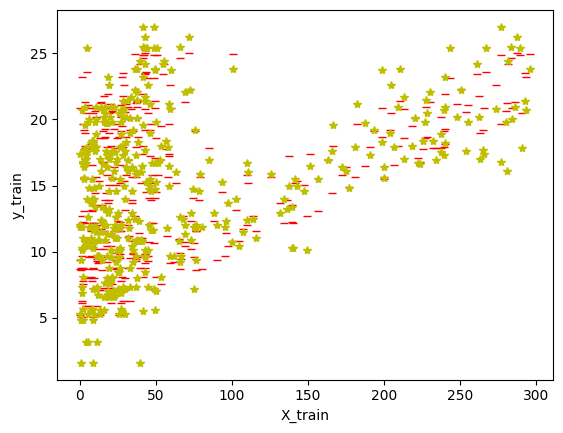

In [50]:
# plot the data using seaborn 
# plt.scatter(X_train, y_train)????????
plt.plot(X_train, y_pred_model, "_r")
plt.plot(X_train, y_train, "*y")

plt.xlabel("X_train")
plt.ylabel("y_train")


In [53]:
# now lets do the same for the test data, data that has notbeen seen by the model: x_test
y_pred_test= lr.predict(X_test)
y_pred_test.size

60

Text(0, 0.5, 'y_train')

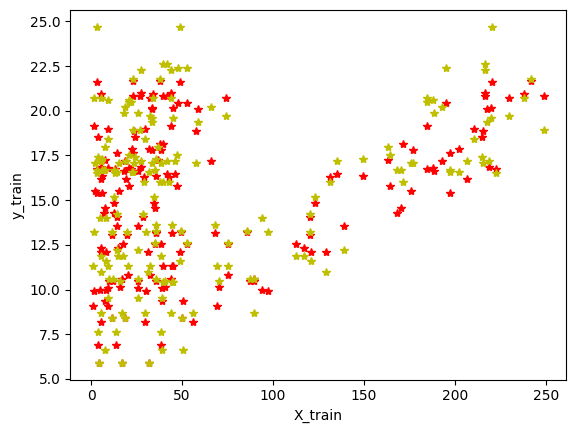

In [55]:
# plot the data using seaborn 
# plt.scatter(X_test, y_test)
# plt.plot(X_test, y_pred_test, color="red")
plt.plot(X_test, y_pred_test, "*r")
plt.plot(X_test, y_test, "*y")

plt.xlabel("X_train")
plt.ylabel("y_train")



In [56]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("r2_score", r2_score(y_train, y_pred_model))
print("mean_sq", mean_squared_error(y_train, y_pred_model))
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_model))
# 1 - mse/varfaince of targets

r2_score 0.91049938193816
mean_sq 2.7949223783659773
mean_absolute_error 1.2355264850397338


In [57]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("r2_score", r2_score(y_test, y_pred_test))
print("mean_sq", mean_squared_error(y_test, y_pred_test))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_test))

r2_score 0.8655979373420271
mean_sq 2.6360765623280673
mean_absolute_error 1.2278183566589413


In [66]:
# doing the same for lasso:
clf= linear_model.Lasso(alpha=0.9)

In [67]:
clf.fit(X_train, y_train)

Lasso(alpha=0.9)

In [68]:
clf.intercept_

4.449278773127023

In [69]:
clf.coef_

array([0.05376281, 0.10655777, 0.00547279])

In [71]:
# doing the same for Ridge:
clf= linear_model.Ridge(alpha=0.5)
clf.fit(X_train, y_train)
clf.intercept_
clf.coef_

array([0.05382908, 0.11001022, 0.00629046])

In [ ]:
# doing the same for ElasticNet:
clf= linear_model.ElasticNet(alpha=1)
clf.fit(X_train, y_train)
clf.intercept_
clf.coef_